In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os, json
import yaml
import numpy as np

In [2]:
"create a dataframe from all log files"
pf = os.listdir('logs/last_run')
log_files = [f for f in pf if f.endswith('.csv')]
df = pd.DataFrame(columns=['tid', 'this_nid', 'logged_time'])
for log_file in log_files:
    with open("logs/last_run/"+log_file, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            df = pd.concat([df,pd.DataFrame([{'tid': row[0], 'this_nid': row[1], 'logged_time': row[2]}])], ignore_index=True)

In [3]:
'''loop over tids, get max logged time for each tid'''
rct_results = []
ctr = 0
for tid in df['tid'].unique():
    ctr += 1
    # if ctr == 3:
    #     break
    df_tid = df[df['tid'] == tid]
    max_time = df_tid['logged_time'].max()
    start_time = df_tid[df_tid['this_nid'] == 'mewbie_client']['logged_time'].min()
    rct = float(max_time) - float(start_time)
    rct_results.append(rct)
    # print(f"Start time for tid {tid}: {start_time}")
    # print(f"Max logged time for tid {tid}: {max_time}")
    # print(f"Request completion time for tid {tid}: {rct}")

# write rct_results as json into results folder
with open("results/pg_heavy_logs_thr1000/pgh_thr1000_results.json", "w") as f:
    json.dump(rct_results, f)

# write rct values into results folder



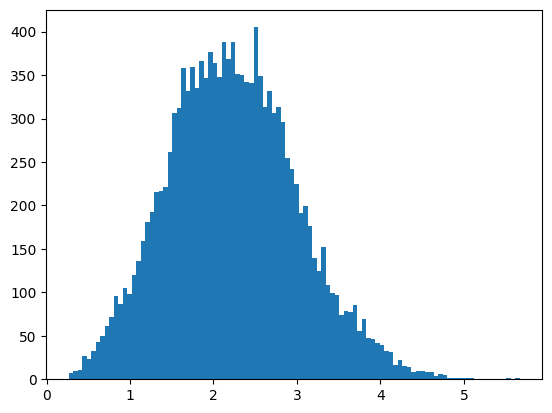

In [5]:
'''Frequency distribution of request completion time for each rct bin by one second bins from rct_results'''
results=[]
for i in rct_results:
    if i > 0:
        results.append(i)
plt.hist(results, bins=100)
plt.show()


In [ ]:
# print(rct_results)
counts, bin_edges = np.histogram(rct_results, bins=10)

# Create bin centers for the line plot
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, counts, marker='o', linestyle='-', color='blue')

# Add titles and labels
plt.title("Distribution of RCT")
plt.xlabel("Rct")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [27]:
# with open("rt_stats.yml", "r") as file:
#     data = yaml.safe_load(file)
# print(data.keys())
# import numpy as np
# import yaml

# Load the YAML data from a file
def load_yaml_file(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data['processing_times_sl_hist']  # Access the nested key

def calculate_percentiles_from_hist(hist):
    # Create the data array using numpy.repeat
    values = [item['rt'] for item in hist if 'rt' in item]
    weights = [item['count'] for item in hist if 'count' in item]
    
    # Use numpy's repeat function to handle large counts efficiently
    data = np.repeat(values, weights)
    
    # Calculate percentiles from 1st to 100th
    percentiles = np.percentile(data, np.arange(1, 101))
    
    # Round the percentiles to 3 decimal places
    percentiles = np.round(percentiles, 2)
    
    return percentiles

# Example of how to use the function
yaml_data = load_yaml_file("rt_stats.yml")
percentiles = calculate_percentiles_from_hist(yaml_data)
print([int(p) for p in percentiles])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 11, 12, 13, 15, 16, 18, 20, 22, 25, 29, 33, 39, 45, 52, 62, 70, 78, 87, 97, 111, 126, 143, 164, 188, 220, 254, 289, 331, 379, 446, 3892811]


In [ ]:

with open("rt_stats.yml", 'r') as file:
    data = yaml.safe_load(file)
# Extract the counts and response times (rt)
counts = [item['count'] for item in data['processing_times_sl_hist']]
rts = [item['rt'] for item in data['processing_times_sl_hist']]

# Create a bar chart
plt.bar(rts, counts)

# Labeling the chart
plt.xlabel('Response Time (rt)')
plt.ylabel('Count')
plt.title('Frequency Distribution of Response Times')

# Display the graph
plt.show()